# Shakespeare & Company Analysis

Reading in necessary libraries and modules

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import pandas as pd

Reading in books.csv, setting the encoding to utf-8

In [2]:
books = pd.read_csv('books.csv', encoding='utf-8', dtype={'year': 'Int32'})

The empty cells in the format column are filled in with 'Unknown.' 

In [3]:
di_data = books['format'].fillna('Unknown')
counts = di_data.value_counts()
print(counts)

Book                 5512
Unknown               410
Periodical             93
Photograph              2
Phonograph Record       1
Article                 1
Prints                  1
Name: format, dtype: int64


Visualization of the overall inventory of Shakespeare & Company.

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
ax.pie(counts)
ax.set_title('Item Formats')
legend_labels = [f'{counts.index[i]}: {counts.values[i]}' for i in range(len(counts))]
ax.legend(legend_labels, loc='lower left')
axins = zoomed_inset_axes(ax, 13, loc='center right')
axins.pie(counts)
plt.show()

top 15 items purchased / borrowed

In [7]:
tb_data = books[['title','borrow_count']].nlargest(15,'borrow_count')
tp_data = books[['title','purchase_count']].nlargest(15,'purchase_count')

def plot_barh(title, x_label, y_label, data, column, color):
    plt.figure(figsize=(10,6))
    plt.barh(data[column], data[x_label], color=color)
    # declare count on bar
    for i, v in enumerate(data[x_label]):
        plt.text(v + 0.3, i, str(v), color='black', fontsize=8, va='center')
    plt.subplots_adjust(left=0.4, right=0.95, top=0.95, bottom=0.1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(which='major', color='silver', linewidth=0.4, alpha=0.4)
    plt.grid(which='minor', color='whitesmoke', linestyle=':', linewidth=0.3, alpha=0.3)
    plt.minorticks_on()
    plt.show()

Call plot_barh function, illustrating the top 15 most borrowed items.

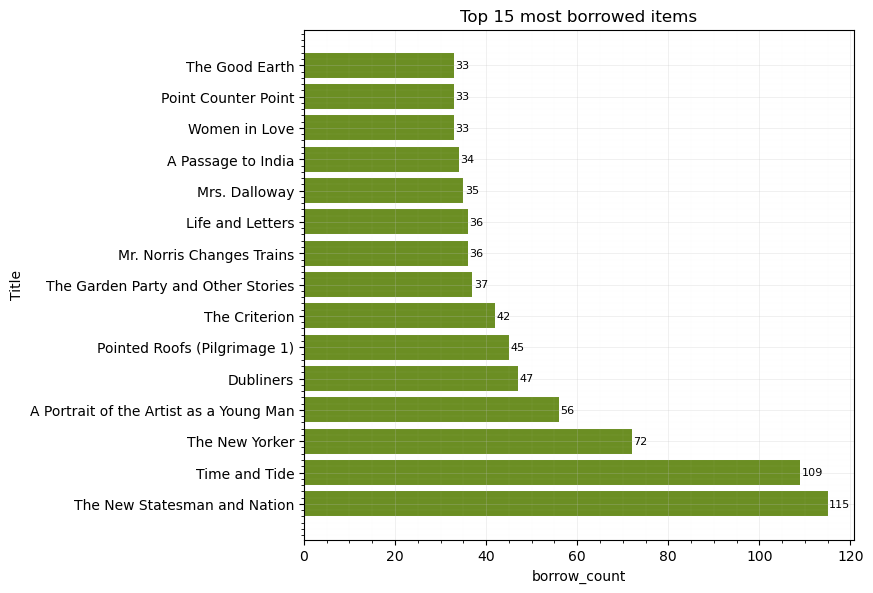

In [8]:
plot_barh('Top 15 most borrowed items', 'borrow_count', 'Title', tb_data, 'title', 'olivedrab')

Call plot_barh function, illustrating the top 15 most purchased items. Instead of borrow_count, we now access the purchase_count column.

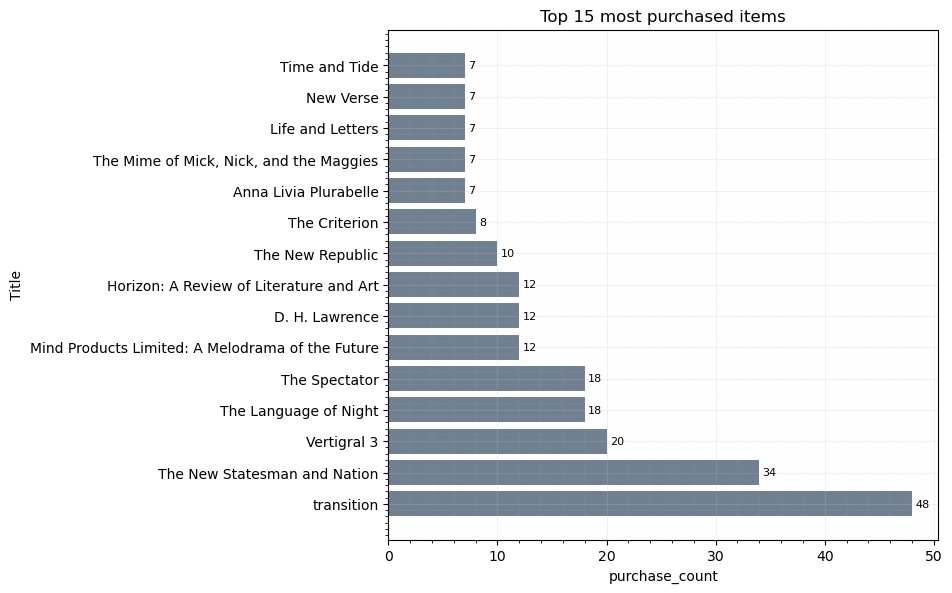

In [9]:
plot_barh('Top 15 most purchased items', 'purchase_count', 'Title', tp_data, 'title', 'slategrey')

The filter_events function already includes the reading of events.csv. 

In [ ]:
def filter_events(event_type, author_name=None):
    df = pd.read_csv('events.csv', encoding='utf-8', low_memory=False)
    df = df[['start_date', 'event_type', 'item_authors']].dropna()
    df['start_date'] = df['start_date'].str.replace('\D+', '', regex=True).str[:4].astype(int)
    # I chose to filter with <= 1941 because the bookstore officially closed in 1941. After this they ocassionally sold or lend books but the bookstore itself didn't exist anymore
    df =  df[(df['start_date'].astype(str).str.match('^19[1-4]\d$')) & (df['start_date'] <= 1941)]
    df = df.loc[df['event_type'] == event_type]
    # in case it should be filtered by author
    if author_name is not None:
        df = df[df['item_authors'].astype(str).str.match(author_name)]
    df['start_date'] = pd.to_datetime(df['start_date'], format='%Y')
    count = df['start_date'].dt.year.value_counts()
    count = count.sort_index()
    return count

Using the filter_events function on the borrow and purchase count, respectively.

In [ ]:
b_count = filter_events('Borrow')
p_count = filter_events('Purchase')

Visualization

In [ ]:
## matplotlib

plt.figure(figsize=(10,6))

plt.plot(b_count.index, b_count.values, label='Borrow History (1919-1941)', color='dodgerblue')
plt.plot(p_count.index, p_count.values, label='Purchase History (1920-1941)', color='darkviolet')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Borrow and Purchase history')
plt.legend()
plt.grid(which='major', color='silver', linewidth=0.8)
plt.grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.7)
plt.minorticks_on()
plt.show()

top books by specific authors

In [ ]:
def author_items(author):
    df = pd.read_csv('events.csv', encoding='utf-8', low_memory=False)
    df = df[['start_date', 'event_type', 'item_authors', 'item_title']].dropna()
    df['start_date'] = df['start_date'].str.replace('\D+', '', regex=True).str[:4].astype(int)
    borrow =  df[(df['start_date'].astype(str).str.match('^19[1-4]\d$')) & (df['start_date'] <= 1941)] 
    borrow = borrow[(borrow['item_authors'].astype(str).str.match(author)) & borrow['event_type'].astype(str).str.match('^Borrow$')]
    item_counts = borrow[['event_type', 'item_title']].groupby('item_title').count()
    item_counts.columns = ['borrow_count']
    item_counts = item_counts.sort_values(by='borrow_count')
    item_counts = item_counts.reset_index()
    return item_counts

eh_borrow = author_items('^Hemingway, Ernest$')
vw_borrow = author_items('^Woolf, Virginia$')
wf_borrow = author_items('^Faulkner, William$')

In [ ]:
plot_barh('Hemingway books ranked by borrow count', 'borrow_count', 'Title', eh_borrow, 'item_title', 'orange')
plot_barh('Woolf books ranked by borrow count', 'borrow_count', 'Title', vw_borrow, 'item_title', 'lightseagreen')
plot_barh('Faulkner books ranked by borrow count', 'borrow_count', 'Title', wf_borrow, 'item_title', 'maroon')

In [ ]:
# comparison between 4 authors

dhl_count = filter_events('Borrow','Lawrence, D. H.')
vw_count = filter_events('Borrow','Woolf, Virginia')
eh_count = filter_events('Borrow','Hemingway, Ernest')
jj_count = filter_events('Borrow','Joyce, James')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dhl_count.index, dhl_count.values, label='Lawrence, D. H.', color='darkgreen')
plt.plot(vw_count.index, vw_count.values, label='Woolf, Virginia', color='lightseagreen')
plt.plot(eh_count.index, eh_count.values, label='Hemingway, Ernest', color='orange')
plt.plot(jj_count.index, jj_count.values, label='James Joyce', color='indianred')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Borrow history of the works of: Lawrence vs Woolf vs Hemingway vs Joyce')
plt.legend()
plt.grid(which='major', color='silver', linewidth=0.8)
plt.grid(which='minor', color='gainsboro', linestyle=':', linewidth=0.7)
plt.minorticks_on()
plt.show()